In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multitest import multipletests
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
from skbio.stats.distance import DistanceMatrix
from skbio.stats.distance import permanova
import seaborn as sns

In [2]:
def calc_mean_het_lvl(het_df):
    het_df = het_df[het_df['Total_Depth'] >= 1000].reset_index().drop(columns=['index'])

    het_lvls = pd.DataFrame(columns=['sample', 'het_lvl'])
    for i in het_df.index:
        sample = het_df.iloc[i,0]
        ref_allele = het_df.iloc[i,2]
        ref_fraction = het_df[f"Fraction_{ref_allele}"][i]

        minority_fraction = 1 - ref_fraction
        het_lvls.loc[i,'sample'] = sample
        het_lvls.loc[i,'het_lvl'] = minority_fraction

    het_lvls = het_lvls[(het_lvls['het_lvl'] >= 0.05) & (het_lvls['het_lvl'] <= 0.95)]
    het_lvls = het_lvls.groupby('sample').mean()

    return het_lvls

In [3]:
het_all = pd.read_csv('../data/heteroplasmy_ALL.csv')
anamnesis = pd.read_csv('../data/anamnesis.csv', index_col=0)

het_lvl = calc_mean_het_lvl(het_all)
anamnesis = anamnesis.iloc[:,0].map({"МС":1, "ГС":0, "УЗД":0}) # all russian letters, smh


# Cytokines

In [4]:

cytokines = pd.read_csv('../data/cytokines.csv', header=[0, 1], index_col=0)



# keep fold-change only
columns_to_keep = []
for col in cytokines.columns:
    if col[1] == 'FC':
        columns_to_keep.append(col)

fc_df = cytokines[columns_to_keep]
fc_df.columns = [col[0] for col in fc_df.columns]

fc_df['mean_het_lvl'] = het_lvl.reindex(fc_df.index)
fc_df['disease'] = anamnesis.reindex(fc_df.index)
fc_df = fc_df.replace('FALSE', np.nan)
fc_df = fc_df.dropna()
fc_df.to_csv('../data/het_cyto_data.tsv', sep='\t')

/tmp/ipykernel_9747/2328377780.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df['mean_het_lvl'] = het_lvl.reindex(fc_df.index)
/tmp/ipykernel_9747/2328377780.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fc_df['disease'] = anamnesis.reindex(fc_df.index)


In [5]:
fc_df

,IL-6,MCP-1,IL-1b,TNF-a,IL-10,IL-8,mean_het_lvl,disease
5,220.947754,43.464305,2.795976,307.813620,75.573990,8.518603,0.095706,1
6,99.129891,12.545548,1.970814,12.892022,14.675090,157.289657,0.371491,1
7,71.148681,3.026672,2.425959,24.003158,23.084995,1.000000,0.089496,1
11,20.000000,1.215848,3.190663,24.434444,24.109061,1.000000,0.448596,1
13,88.591794,4.507878,1.888006,20.632980,34.908852,2.485923,0.253391,1
15,36.828329,0.962080,1.821174,12.118703,17.131901,1.000000,0.087325,1
27,412.888465,11.685180,5.505951,41.587768,344.189944,8.995548,0.088332,1
31,158.174432,11.314378,4.322621,72.791282,79.709176,1.813686,0.090535,1
40,2990.356958,91.986430,3.861303,77.112394,1225.374613,6.205014,0.083177,1
46,331.646638,226.317705,36.819897,178.050036,154.324930,18.253838,0.083149,0


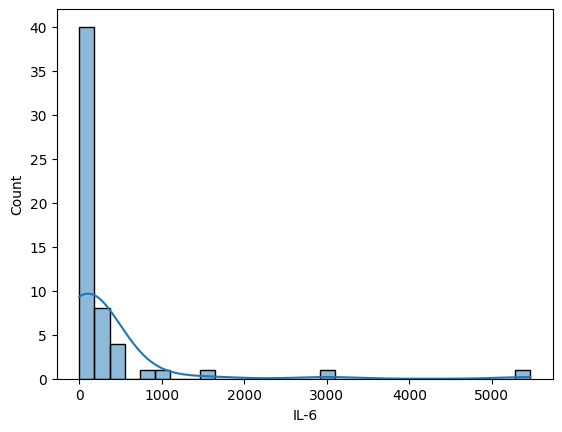

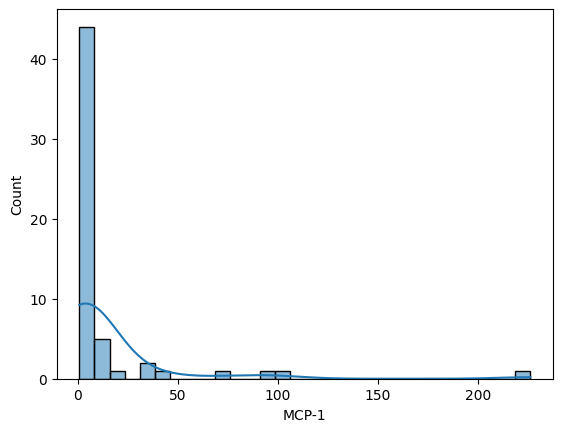

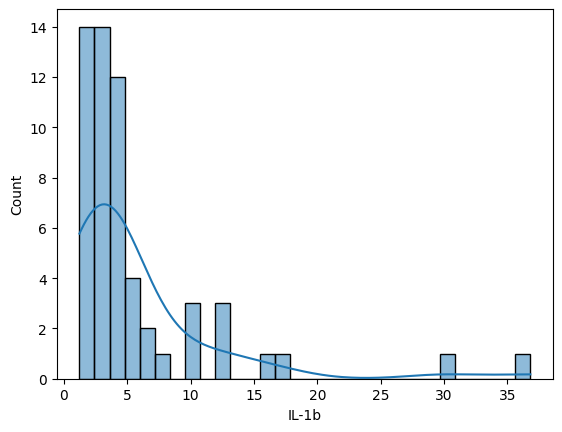

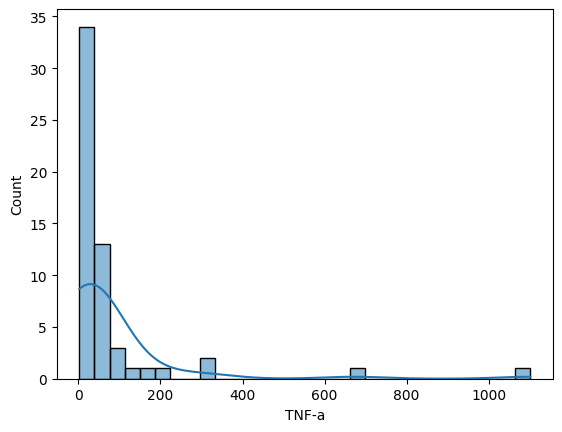

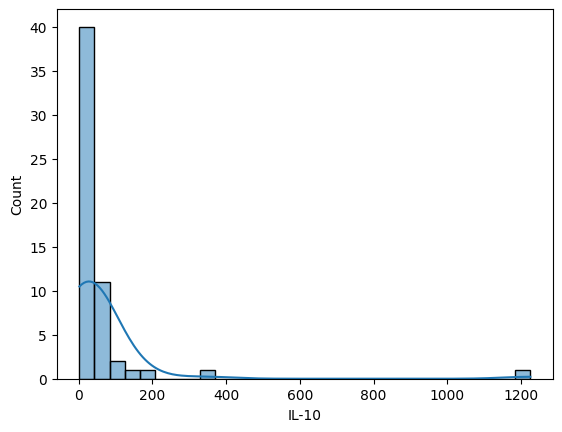

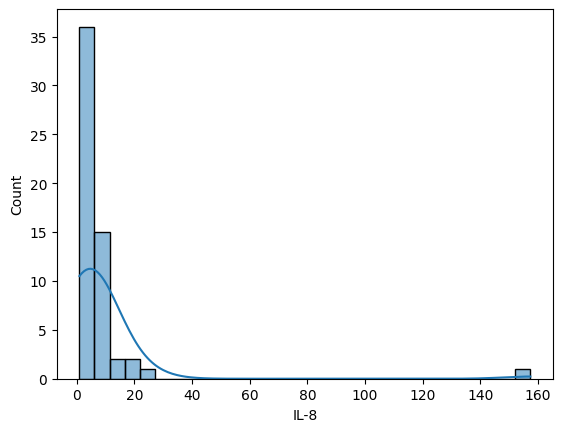

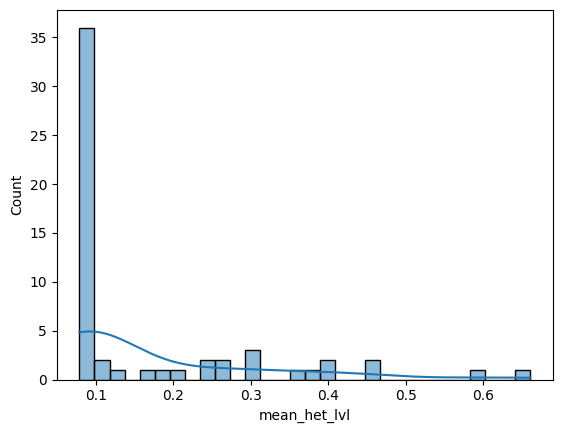

In [6]:
for data in fc_df.drop(columns=['disease']).columns:
    sns.histplot(data=fc_df, x=data, kde=True, bins=30)
    plt.show()


In [7]:
fc_df['disease'].value_counts()

disease
0    37
1    20
Name: count, dtype: int64

TtestResult(statistic=np.float64(-1.4463455005398702), pvalue=np.float64(0.15375540698468665), df=np.float64(55.0))

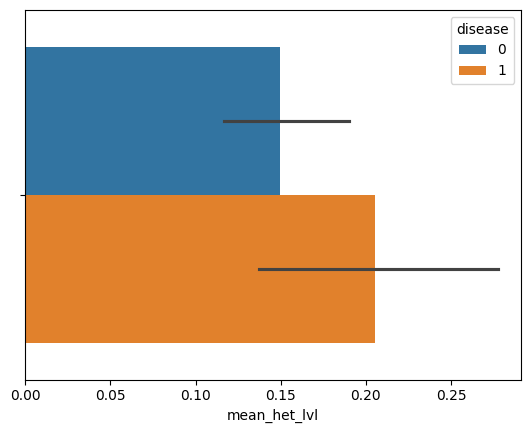

In [8]:
sns.barplot(data=fc_df, x='mean_het_lvl', hue='disease')
ttest_ind(fc_df[fc_df['disease'] == 0]['mean_het_lvl'].to_list(), fc_df[fc_df['disease'] == 1]['mean_het_lvl'].to_list())

In [9]:
X = fc_df.drop('disease', axis=1)
y = fc_df['disease']    

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
pca = PCA()  # We'll keep 2 components for visualization
principal_components = pca.fit_transform(X_scaled)

In [11]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Principal components shape:", principal_components.shape)

Explained variance ratio: [0.28335781 0.19849911 0.17077559 0.12539069 0.10556884 0.08346955
 0.0329384 ]
Principal components shape: (57, 7)


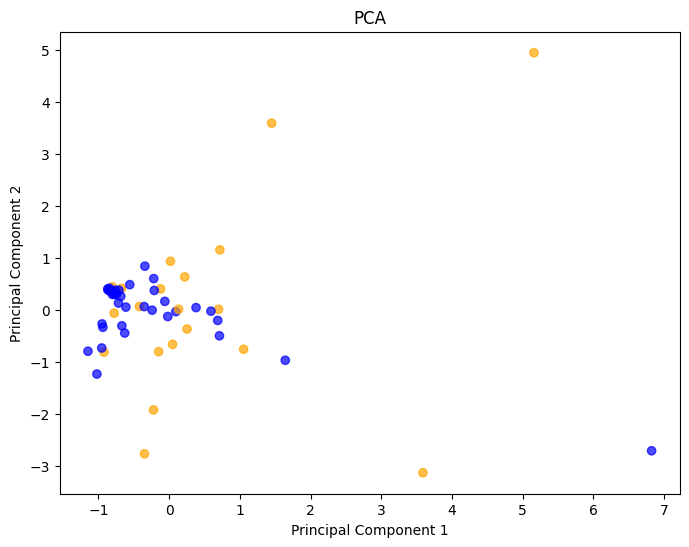

In [12]:
# Create a color list based on True/False
color_dict = {0: 'blue', 1: 'orange', 2:"red"}


colors = [color_dict[val] for val in y]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_components[:, 0], 
                      principal_components[:, 1], 
                      c=colors,
                      alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

In [13]:
# manova breakes with dashes
fc_df.columns = ['IL6', 'MCP1', 'IL1b', 'TNFa', 'IL10', 'IL8', 'mean_het_lvl', 'disease']
fc_df_scaled = fc_df.copy()

# mean_het_lvl is weird af for manova, so we need to use scaler. manova IS NOT affected by scaling, it's required just to run it
fc_df_scaled[fc_df_scaled.columns[:-1]] = StandardScaler().fit_transform(fc_df_scaled[fc_df_scaled.columns[:-1]])

manova = MANOVA.from_formula('IL6 + MCP1 + IL1b + TNFa + IL10 + IL8 ~ disease + mean_het_lvl', 
                             data=fc_df_scaled)
print(manova.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9023 6.0000 49.0000  0.8841 0.5137
         Pillai's trace 0.0977 6.0000 49.0000  0.8841 0.5137
 Hotelling-Lawley trace 0.1083 6.0000 49.0000  0.8841 0.5137
    Roy's greatest root 0.1083 6.0000 49.0000  0.8841 0.5137
------------------------------------------------------------
                                                            
------------------------------------------------------------
        disease         Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.7685 6.0000 49.0000  2.4598 0.0370
         Pillai's trace 0.2315 6.0000 49.0000  2.4598 0.0370
 Hotelling-Lawley trace 0.3012 6.0000 49.0

In [14]:
cytokines = ['IL6', 'MCP1', 'IL1b', 'TNFa', 'IL10', 'IL8', 'mean_het_lvl'] # het is not cyto, but whatever, you get the idea

results = []
for cyto in cytokines:
    group_false = fc_df_scaled[fc_df_scaled['disease'] == 0][cyto]
    group_true = fc_df_scaled[fc_df_scaled['disease'] == 1][cyto]
    
    # Normality check
    p_norm_false = shapiro(group_false).pvalue
    p_norm_true = shapiro(group_true).pvalue
    
    # Choose test
    if p_norm_false > 0.05 and p_norm_true > 0.05:
        stat, pval = ttest_ind(group_false, group_true, equal_var=False)
        test_type = 't-test'
    else:
        stat, pval = mannwhitneyu(group_false, group_true, alternative='two-sided')
        test_type = 'Mann-Whitney'
    
    results.append((cyto, test_type, pval))

df_cyto_stats = pd.DataFrame(results, columns=['Cytokine', 'Test', 'p-value'])

print(df_cyto_stats)


       Cytokine          Test   p-value
0           IL6  Mann-Whitney  0.004594
1          MCP1  Mann-Whitney  0.051416
2          IL1b  Mann-Whitney  0.086548
3          TNFa  Mann-Whitney  0.010774
4          IL10  Mann-Whitney  0.009319
5           IL8  Mann-Whitney  0.087858
6  mean_het_lvl  Mann-Whitney  0.212871


# Gene expression


In [15]:
expression = pd.read_csv('../data/expression.tsv', sep='\t', index_col='Samples')
expression['mean_het_lvl'] = het_lvl.reindex(expression.index)
expression['disease'] = anamnesis.reindex(expression.index)
expression = expression.dropna()
# log2 all the expressions
expression.iloc[:,:-2] = np.log2(expression.iloc[:,:-2])
expression

,NFKBIA,p65,ANT2,NOX2,SOD2,UCP2,MT-CYB,MT-ND1,MT-ND4,MT-RNR1,MT-RNR2,DRP1,MFN2,NFE2L2,OPA1,TFAM,mean_het_lvl,disease
Samples,,,,,,,,,,,,,,,,,,
5,0.833902,-1.653355,0.137504,0.845992,0.148739,-0.638007,-0.935117,0.471031,1.645702,0.963696,0.565890,1.578886,-1.086017,0.246870,-1.536419,1.776854,0.095706,1
6,0.714927,-1.593790,0.310340,-0.024003,1.155555,-0.288417,-0.646112,0.292311,1.584000,0.762987,0.547845,1.145377,-0.339272,0.134063,-10.150209,1.475075,0.371491,1
7,0.514804,-1.224654,0.505891,0.607579,0.824238,-0.344465,3.277985,0.888772,0.985136,0.932968,1.256467,1.272095,-1.667172,0.999668,0.947045,1.940268,0.089496,1
11,1.672154,-0.317786,0.536053,-0.901311,0.836247,-0.427789,0.731183,-1.147522,-1.895395,-1.104387,-0.654944,-0.308930,-0.904467,1.078063,0.833700,-0.291045,0.448596,1
27,-0.623487,-0.028705,-0.033570,-0.063560,0.554343,0.340277,-1.498179,-0.349971,0.623867,0.321351,-0.011879,0.236499,0.485623,-0.157592,1.778532,0.318068,0.088332,1
31,-1.057992,-2.611755,0.378512,-0.120137,0.531169,0.521151,-1.325539,0.409798,1.313072,0.252173,-0.070360,1.476107,-2.263889,-0.392270,1.359403,1.344902,0.090535,1
34,0.037312,1.171271,0.344828,1.592876,0.792855,-1.053494,2.084064,-0.739854,-0.565545,0.050745,0.527871,1.248523,0.462220,2.372295,0.942683,0.945638,0.094237,0
35,0.366924,-0.035195,0.238787,-0.642279,0.243060,0.128293,-2.070967,-0.597933,-0.152324,-0.702750,-0.843474,-2.600687,-0.091172,-0.057046,1.442275,-1.076919,0.343766,1
37,-0.233447,-0.007812,-0.005782,0.722816,-0.550465,0.572017,-1.261881,0.330444,0.255682,-0.595969,-0.296191,-2.368700,0.172065,0.095155,-4.669327,0.385409,0.09548,0


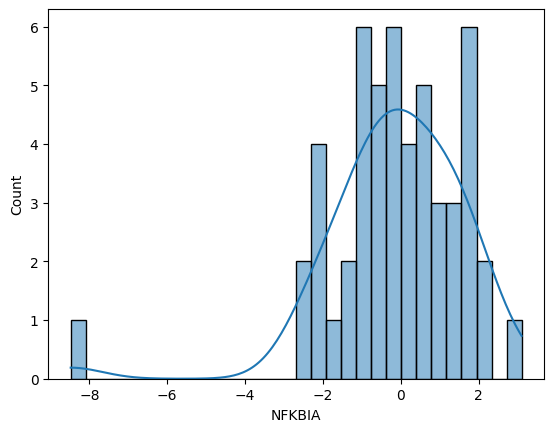

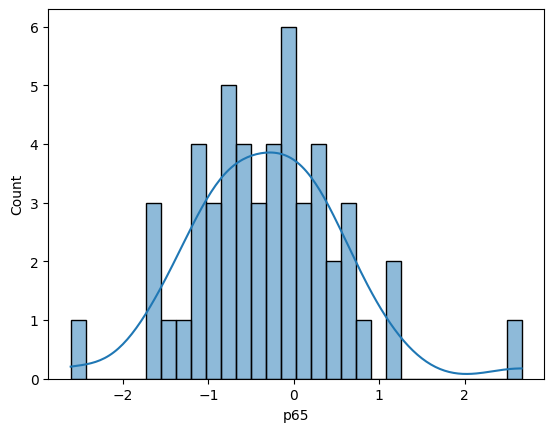

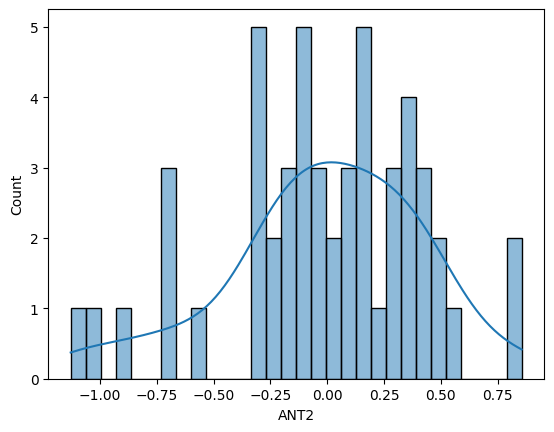

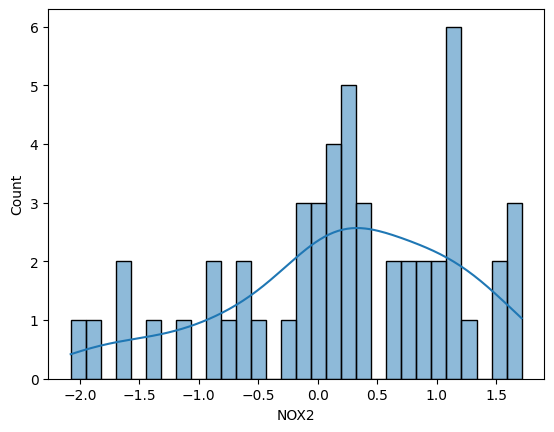

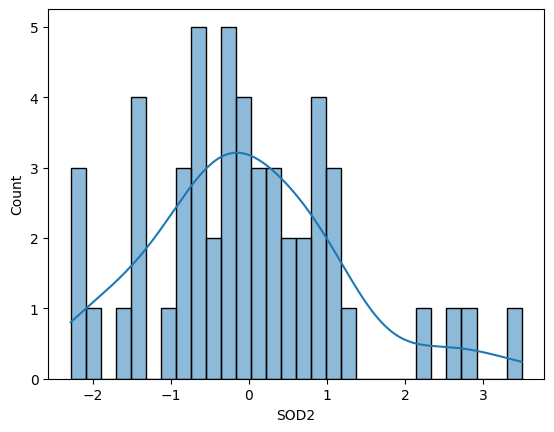

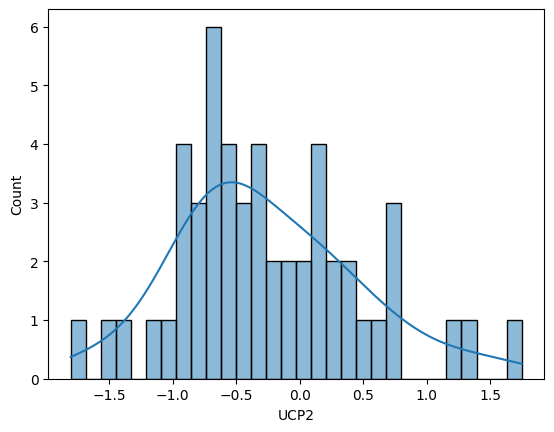

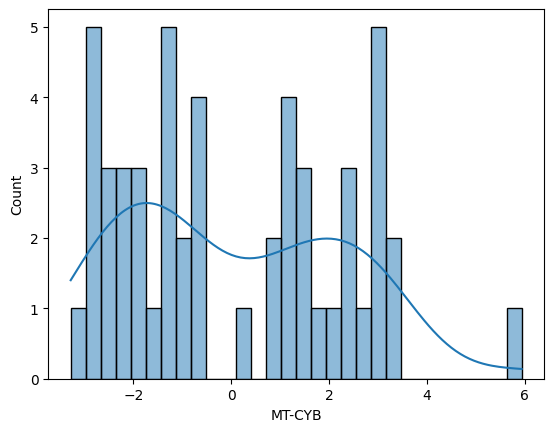

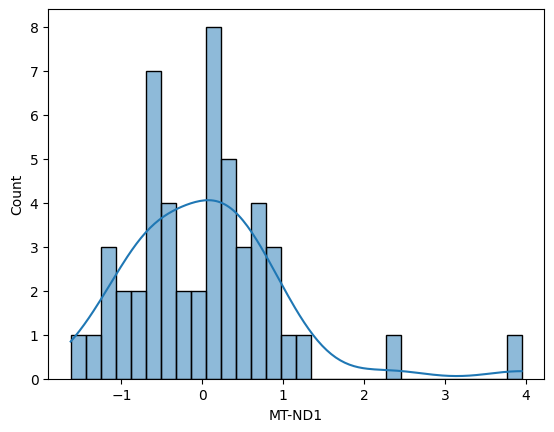

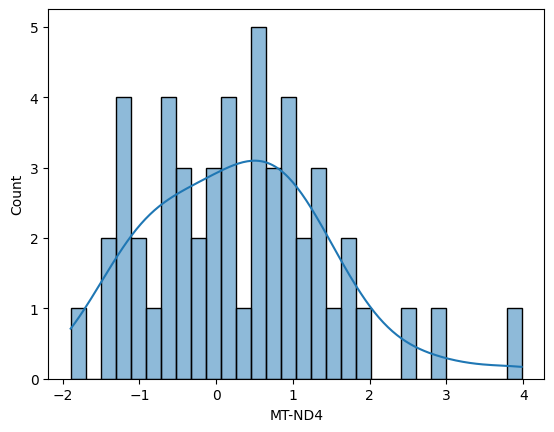

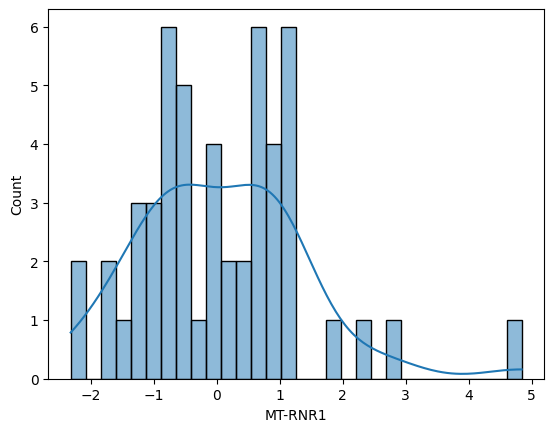

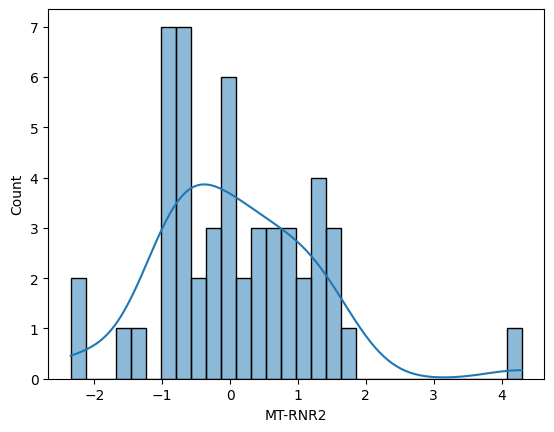

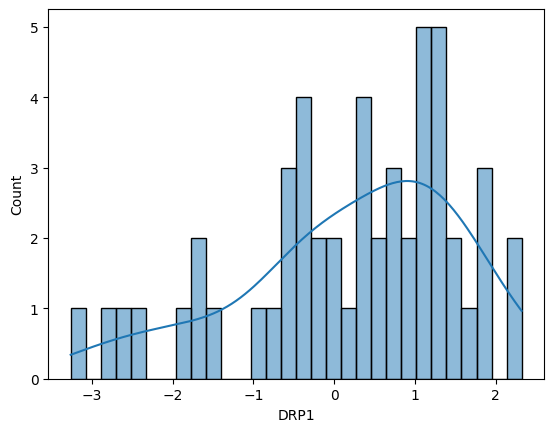

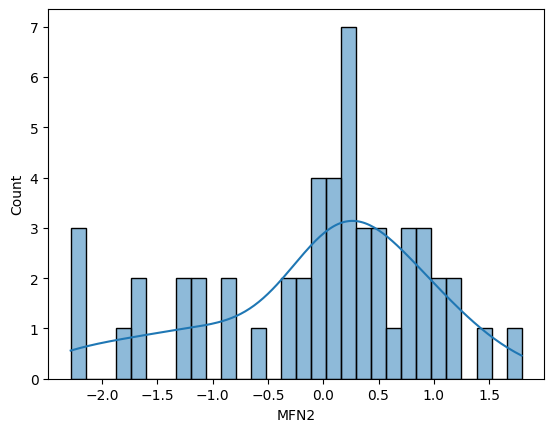

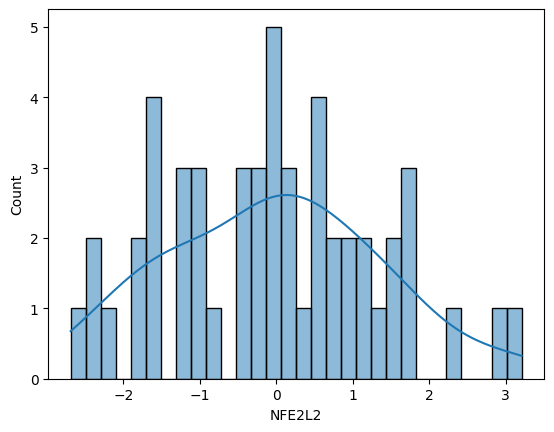

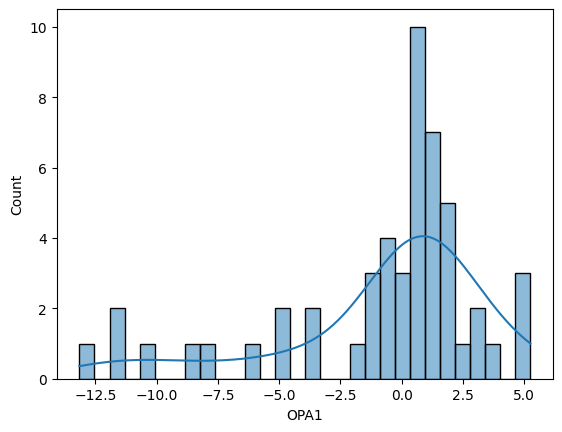

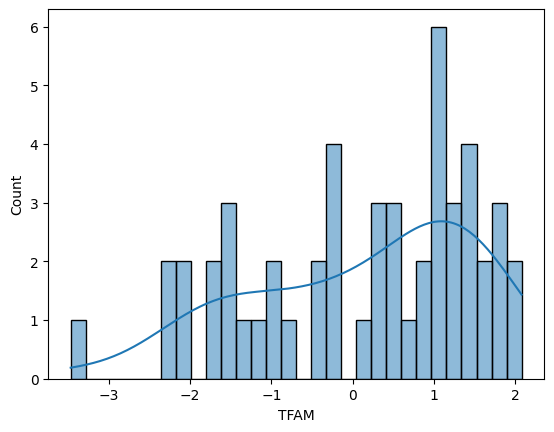

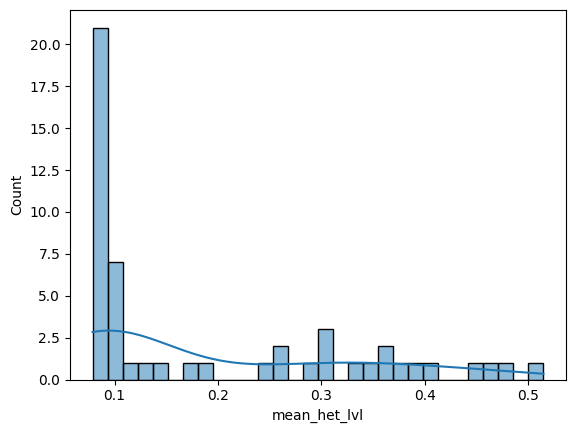

In [16]:
for data in expression.drop(columns=['disease']).columns:
    sns.histplot(data=expression, x=data, kde=True, bins=30)
    plt.show()

In [17]:
expression['disease'].value_counts()

disease
0    31
1    20
Name: count, dtype: int64

In [18]:
expression.columns

Index(['NFKBIA', 'p65', 'ANT2', 'NOX2', 'SOD2', 'UCP2', 'MT-CYB', 'MT-ND1',
       'MT-ND4', 'MT-RNR1', 'MT-RNR2', 'DRP1', 'MFN2', 'NFE2L2', 'OPA1',
       'TFAM', 'mean_het_lvl', 'disease'],
      dtype='object')

In [19]:
expression.columns = ['NFKBIA', 'p65', 'ANT2', 'NOX2', 'SOD2', 'UCP2', 'MTCYB', 'MTND1',
       'MTND4', 'MTRNR1', 'MTRNR2', 'DRP1', 'MFN2', 'NFE2L2', 'OPA1',
       'TFAM', 'mean_het_lvl', 'disease']
expression_scaled = expression.copy()

# mean_het_lvl is weird af for manova, so we need to use scaler. manova IS NOT affected by scaling, it's required just to run it
expression_scaled[expression_scaled.columns[:-1]] = StandardScaler().fit_transform(expression_scaled[expression_scaled.columns[:-1]])
print("all_exp")
manova = MANOVA.from_formula('NFKBIA + p65 + ANT2 + NOX2 + SOD2 + UCP2 + MTCYB + MTND1 + MTND4 + MTRNR1 + MTRNR2 + DRP1 + MFN2 + NFE2L2 + OPA1 + TFAM ~ disease + mean_het_lvl', 
                             data=expression_scaled)
print(manova.mv_test())


all_exp
                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value   Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8199 16.0000 33.0000  0.4531 0.9527
         Pillai's trace 0.1801 16.0000 33.0000  0.4531 0.9527
 Hotelling-Lawley trace 0.2197 16.0000 33.0000  0.4531 0.9527
    Roy's greatest root 0.2197 16.0000 33.0000  0.4531 0.9527
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
        disease         Value   Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.6465 16.0000 33.0000  1.1280 0.3712
         Pillai's trace 0.3535 16.0000 33.0000  1.1280 0.3712
 Hotelling-Lawley 

In [20]:
mt_genes = ['MTCYB', 'MTND1',
       'MTND4', 'MTRNR1', 'MTRNR2','mean_het_lvl', 'disease']
mt_exp = expression_scaled.copy()
print("mt_exp")
manova = MANOVA.from_formula('MTCYB + MTND1 + MTND4 + MTRNR1 + MTRNR2 ~ disease + mean_het_lvl', 
                             data=mt_exp)
print(manova.mv_test())

mt_exp
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9314 5.0000 44.0000  0.6483 0.6642
         Pillai's trace 0.0686 5.0000 44.0000  0.6483 0.6642
 Hotelling-Lawley trace 0.0737 5.0000 44.0000  0.6483 0.6642
    Roy's greatest root 0.0737 5.0000 44.0000  0.6483 0.6642
------------------------------------------------------------
                                                            
------------------------------------------------------------
        disease         Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.8450 5.0000 44.0000  1.6140 0.1763
         Pillai's trace 0.1550 5.0000 44.0000  1.6140 0.1763
 Hotelling-Lawley trace 0.1834 5.00

In [21]:
mt_pc_genes = ['MTCYB', 'MTND1',
       'MTND4', 'mean_het_lvl', 'disease']
mt_pc_exp = expression_scaled.copy()
print("mt_pc_exp")
manova = MANOVA.from_formula('MTCYB + MTND1 + MTND4 ~ disease + mean_het_lvl', 
                             data=mt_pc_exp)
print(manova.mv_test())

mt_pc_exp
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9972 3.0000 46.0000  0.0434 0.9878
         Pillai's trace 0.0028 3.0000 46.0000  0.0434 0.9878
 Hotelling-Lawley trace 0.0028 3.0000 46.0000  0.0434 0.9878
    Roy's greatest root 0.0028 3.0000 46.0000  0.0434 0.9878
------------------------------------------------------------
                                                            
------------------------------------------------------------
        disease         Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9930 3.0000 46.0000  0.1081 0.9549
         Pillai's trace 0.0070 3.0000 46.0000  0.1081 0.9549
 Hotelling-Lawley trace 0.0071 3

In [22]:
mt_rna_genes = ['MTRNR1', 'MTRNR2' 'mean_het_lvl', 'disease']
mt_rna_exp = expression_scaled.copy()
print("mt_rna_exp")
manova = MANOVA.from_formula('MTRNR1 + MTRNR2 ~ disease + mean_het_lvl', 
                             data=mt_rna_exp)
print(manova.mv_test())

mt_rna_exp
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.9572 2.0000 47.0000  1.0511 0.3576
         Pillai's trace 0.0428 2.0000 47.0000  1.0511 0.3576
 Hotelling-Lawley trace 0.0447 2.0000 47.0000  1.0511 0.3576
    Roy's greatest root 0.0447 2.0000 47.0000  1.0511 0.3576
------------------------------------------------------------
                                                            
------------------------------------------------------------
        disease         Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.8998 2.0000 47.0000  2.6167 0.0837
         Pillai's trace 0.1002 2.0000 47.0000  2.6167 0.0837
 Hotelling-Lawley trace 0.1113 

In [23]:
exp = ['NFKBIA', 'p65', 'ANT2', 'NOX2', 'SOD2', 'UCP2', 'MTCYB', 'MTND1',
       'MTND4', 'MTRNR1', 'MTRNR2', 'DRP1', 'MFN2', 'NFE2L2', 'OPA1',
       'TFAM']

results = []
for gene in exp:
    group_false = expression_scaled[expression_scaled['disease'] == 0][gene]
    group_true = expression_scaled[expression_scaled['disease'] == 1][gene]
    
    # Normality check
    p_norm_false = shapiro(group_false).pvalue
    p_norm_true = shapiro(group_true).pvalue
    
    # Choose test
    if p_norm_false > 0.05 and p_norm_true > 0.05:
        stat, pval = ttest_ind(group_false, group_true, equal_var=False)
        test_type = 't-test'
    else:
        stat, pval = mannwhitneyu(group_false, group_true, alternative='two-sided')
        test_type = 'Mann-Whitney'
    
    results.append((gene, test_type, pval))

df_exp_stats = pd.DataFrame(results, columns=['gene', 'Test', 'p-value'])

print(df_exp_stats)

      gene          Test   p-value
0   NFKBIA  Mann-Whitney  0.423336
1      p65        t-test  0.809538
2     ANT2        t-test  0.992980
3     NOX2        t-test  0.345172
4     SOD2        t-test  0.643257
5     UCP2        t-test  0.152575
6    MTCYB  Mann-Whitney  0.992303
7    MTND1  Mann-Whitney  0.721155
8    MTND4        t-test  0.983869
9   MTRNR1        t-test  0.410586
10  MTRNR2        t-test  0.982079
11    DRP1  Mann-Whitney  0.992303
12    MFN2  Mann-Whitney  0.750235
13  NFE2L2        t-test  0.373284
14    OPA1  Mann-Whitney  0.809432
15    TFAM  Mann-Whitney  0.900205


In [24]:
fc_exp_scaled = fc_df_scaled.join(expression_scaled.drop(columns=['mean_het_lvl', 'disease']), how='inner')
print("fc_cyto + exp")
manova = MANOVA.from_formula('IL6 + MCP1 + IL1b + TNFa + IL10 + IL8 + NFKBIA + p65 + ANT2 + NOX2 + SOD2 + UCP2 + MTCYB + MTND1 + MTND4 + MTRNR1 + MTRNR2 + DRP1 + MFN2 + NFE2L2 + OPA1 + TFAM ~ disease + mean_het_lvl', 
                             data=fc_exp_scaled)
print(manova.mv_test())

fc_cyto + exp
                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value   Num DF Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.1627 22.0000 9.0000  2.1060 0.1241
         Pillai's trace 0.8373 22.0000 9.0000  2.1060 0.1241
 Hotelling-Lawley trace 5.1481 22.0000 9.0000  2.1060 0.1241
    Roy's greatest root 5.1481 22.0000 9.0000  2.1060 0.1241
------------------------------------------------------------
                                                            
------------------------------------------------------------
        disease         Value   Num DF Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.2835 22.0000 9.0000  1.0341 0.5081
         Pillai's trace 0.7165 22.0000 9.0000  1.0341 0.5081
 Hotelling-Lawley trace 2.52